In [1]:
import pandas as pd 
import requests
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV, cross_val_score,
    RandomizedSearchCV, cross_validate,
    StratifiedKFold
)
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')




In [15]:
from dossier_fonction_util import *


In [3]:
DownloadRawData()

In [4]:
raw_df = ReadRawData()
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
raw_df.info()
raw_df.ID.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

array([    1,     2,     3, ..., 29998, 29999, 30000], dtype=int64)

In [6]:
df = formattageRawData()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          30000 non-null  int64   
 1   limit_bal                   30000 non-null  int64   
 2   sex                         30000 non-null  category
 3   education                   30000 non-null  category
 4   marriage                    30000 non-null  category
 5   age                         30000 non-null  int64   
 6   payment_status_sep          24314 non-null  category
 7   payment_status_aug          23950 non-null  category
 8   payment_status_jul          24062 non-null  category
 9   payment_status_jun          24313 non-null  category
 10  payment_status_may          24461 non-null  category
 11  payment_status_apr          24260 non-null  category
 12  bill_statement_sep          30000 non-null  int64   
 13  bill_statement_a

Analyse exploratoire des données 

In [9]:
df.describe().T # pour les variables numeriques

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


In [12]:
df.describe(include=['category']).T

,count,unique,top,freq
sex,30000,2,Female,18112
education,30000,5,University,14030
marriage,30000,3,Single,15964
payment_status_sep,24314,10,0,14737
payment_status_aug,23950,10,0,15730
payment_status_jul,24062,10,0,15764
payment_status_jun,24313,10,0,16455
payment_status_may,24461,9,0,16947
payment_status_apr,24260,9,0,16286
default_payment_next_month,30000,2,0,23364


In [13]:
df.describe(include=['category']).T # pour les variables categorique

,count,unique,top,freq
sex,30000,2,Female,18112
education,30000,5,University,14030
marriage,30000,3,Single,15964
payment_status_sep,24314,10,0,14737
payment_status_aug,23950,10,0,15730
payment_status_jul,24062,10,0,15764
payment_status_jun,24313,10,0,16455
payment_status_may,24461,9,0,16947
payment_status_apr,24260,9,0,16286
default_payment_next_month,30000,2,0,23364


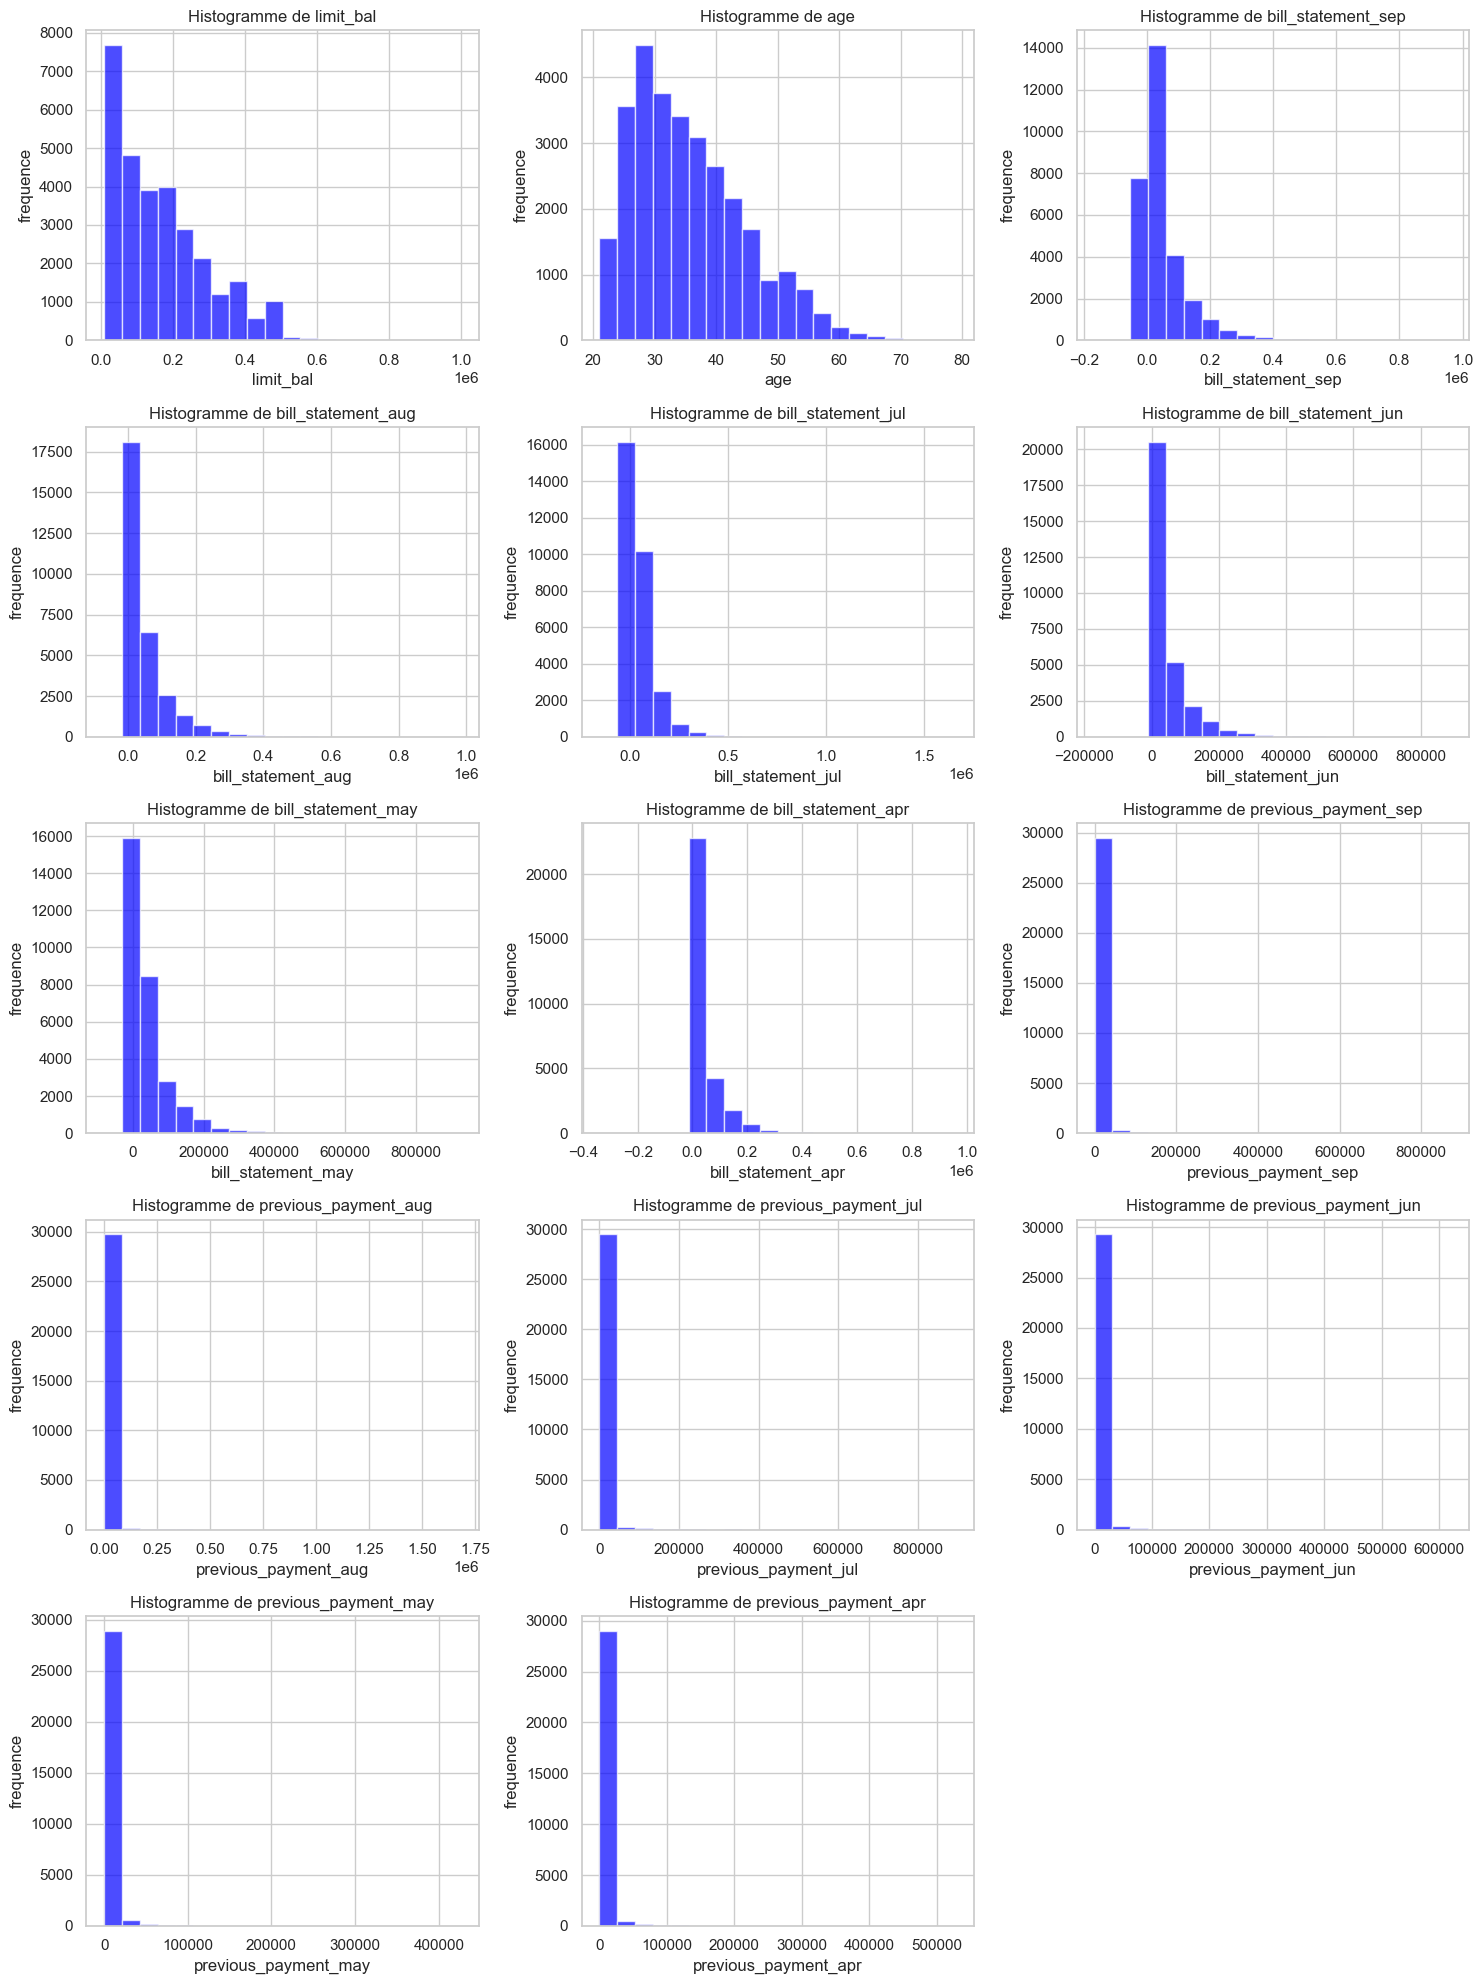

ValueError: 'set2' is not a valid palette name

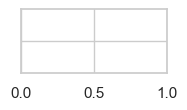

In [16]:
plot_distribution(df)